In [1]:
import segyio
from __future__ import print_function
import os
import sys
import time
from obspy.io.segy.segy import _read_segy, SEGYBinaryFileHeader
from obspy import read
import numpy as np

os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Only GPU 1 is visible to this code

In [3]:
filename = "C:/Users/Admin/Downloads/Kerry3D.segy"

# Read use _read_segy()

In [4]:
t0=time.time()
segy = _read_segy(filename)
print('--> data read in {:.1f} sec'.format(time.time()-t0))

--> data read in 7.0 sec


In [ ]:
binary_file_header = segy.binary_file_header
print("\nbinary_file_header:\n", binary_file_header)

textual_file_header = segy.textual_file_header
print("\ntextual_file_header:\n", textual_file_header)
print("\n")

data_encoding=segy.data_encoding
print("\ndata_encoding:\n",data_encoding)
endian=segy.endian
print("\nendian:\n", endian)
file=segy.file
print("\nfile:\n", file)
classinfo = segy.__class__
print("\nclassinfo:\n", classinfo)
doc = segy.__doc__
print("\ndoc:\n", doc)
ntraces=len(segy.traces)
print("\nntraces:\n", ntraces)
size_M=segy.traces[0].data.nbytes/1024/1024.*ntraces
print("\nsize:\n\t", size_M,"MB")
print("\t", size_M/1024, "GB")


binary_file_header:
 Binary File Header:
	job_identification_number: 0
	line_number: 510
	reel_number: 0
	number_of_data_traces_per_ensemble: 1
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 4000
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 1252
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 1
	ensemble_fold: 1
	trace_sorting_code: 4
	vertical_sum_code: 1
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 0
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

# Read use read()

In [7]:
t0=time.time()
print('sgy use read:')
stream = read(filename)
print('--> data read in {:.1f} min'.format((time.time()-t0)/60))

sgy use read:
--> data read in 0.2 min


In [8]:
print(stream)

210945 Trace(s) in Stream:

Seq. No. in line:    1 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:05.004000Z | 250.0 Hz, 1252 samples
...
(210943 other traces)
...
Seq. No. in line: 210945 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:05.004000Z | 250.0 Hz, 1252 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


In [9]:
i = 0 
trace_i_header = stream[i].stats.segy.trace_header
# print(trace_i_header)
print(stream[i].stats)

         network: 
         station: 
        location: 
         channel: 
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:00:05.004000Z
   sampling_rate: 250.0
           delta: 0.004
            npts: 1252
           calib: 1.0
         _format: SEGY
            segy: AttribDict({'trace_header': LazyTraceHeaderAttribDict({'unpacked_header': b'\x00\x00\x00\x01\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01 \x00\x00\x00:\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x01\x00\x19\xfe\xd6\x00U\x04]\x00\x19\xfe\xd6\x00U\x04]\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\xe4\x0f\xa0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [10]:
i = 0
trace_i_header = stream[i].stats.segy.trace_header
print(trace_i_header.ensemble_number) # crossline number
print(trace_i_header.source_coordinate_x)
print(trace_i_header.source_coordinate_y)
print(trace_i_header.source_energy_direction_mantissa)
print(trace_i_header.source_energy_direction_exponent) # inline number

58
1703638
5571677
0
510


In [11]:
i = 210944
trace_i_header = stream[i].stats.segy.trace_header
print(trace_i_header.ensemble_number) # crossline number
print(trace_i_header.source_coordinate_x)
print(trace_i_header.source_coordinate_y)
print(trace_i_header.source_energy_direction_mantissa)
print(trace_i_header.source_energy_direction_exponent) # inline number

792
1689838
5608539
0
796


In [12]:
il=[]
xl=[]
for i in range(len(stream)):
    trace_i_header = stream[i].stats.segy.trace_header
    il.append(trace_i_header.source_energy_direction_exponent)
    xl.append(trace_i_header.ensemble_number)
    

In [13]:
ilines = np.unique(il)
print(ilines)
print(len(ilines))

[510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527
 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545
 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563
 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581
 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599
 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617
 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635
 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653
 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671
 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689
 690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707
 708 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725
 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743
 744 745 746 747 748 749 750 751 752 753 754 755 75

In [14]:
xlines = np.unique(xl)
print(xlines)
print(len(xlines))

[ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291
 292 293 294 295 296 297 298 299 300 301 302 303 30

In [15]:
from collections import Counter
t0=time.time()
counter = Counter(il)
print('Count in {:.1f} sec'.format(time.time()-t0))
print (sorted(counter.items()))

Count in 0.0 sec
[(510, 735), (511, 735), (512, 735), (513, 735), (514, 735), (515, 735), (516, 735), (517, 735), (518, 735), (519, 735), (520, 735), (521, 735), (522, 735), (523, 735), (524, 735), (525, 735), (526, 735), (527, 735), (528, 735), (529, 735), (530, 735), (531, 735), (532, 735), (533, 735), (534, 735), (535, 735), (536, 735), (537, 735), (538, 735), (539, 735), (540, 735), (541, 735), (542, 735), (543, 735), (544, 735), (545, 735), (546, 735), (547, 735), (548, 735), (549, 735), (550, 735), (551, 735), (552, 735), (553, 735), (554, 735), (555, 735), (556, 735), (557, 735), (558, 735), (559, 735), (560, 735), (561, 735), (562, 735), (563, 735), (564, 735), (565, 735), (566, 735), (567, 735), (568, 735), (569, 735), (570, 735), (571, 735), (572, 735), (573, 735), (574, 735), (575, 735), (576, 735), (577, 735), (578, 735), (579, 735), (580, 735), (581, 735), (582, 735), (583, 735), (584, 735), (585, 735), (586, 735), (587, 735), (588, 735), (589, 735), (590, 735), (591, 735)

# this is a cube shape dataset.

In [16]:
seis_np = np.zeros((287,735,1252))

In [17]:
t0=time.time()
for i in range(210945): # total 1666070 traces in this dataset according to read() results shown above.
    tracei = stream[i]
    il=tracei.stats.segy.trace_header.source_energy_direction_exponent
    xl=tracei.stats.segy.trace_header.ensemble_number
    seis_np[il-510][xl-58] = tracei.data
print('--> data write in {:.1f} min'.format((time.time()-t0)/60))

--> data write in 0.0 min


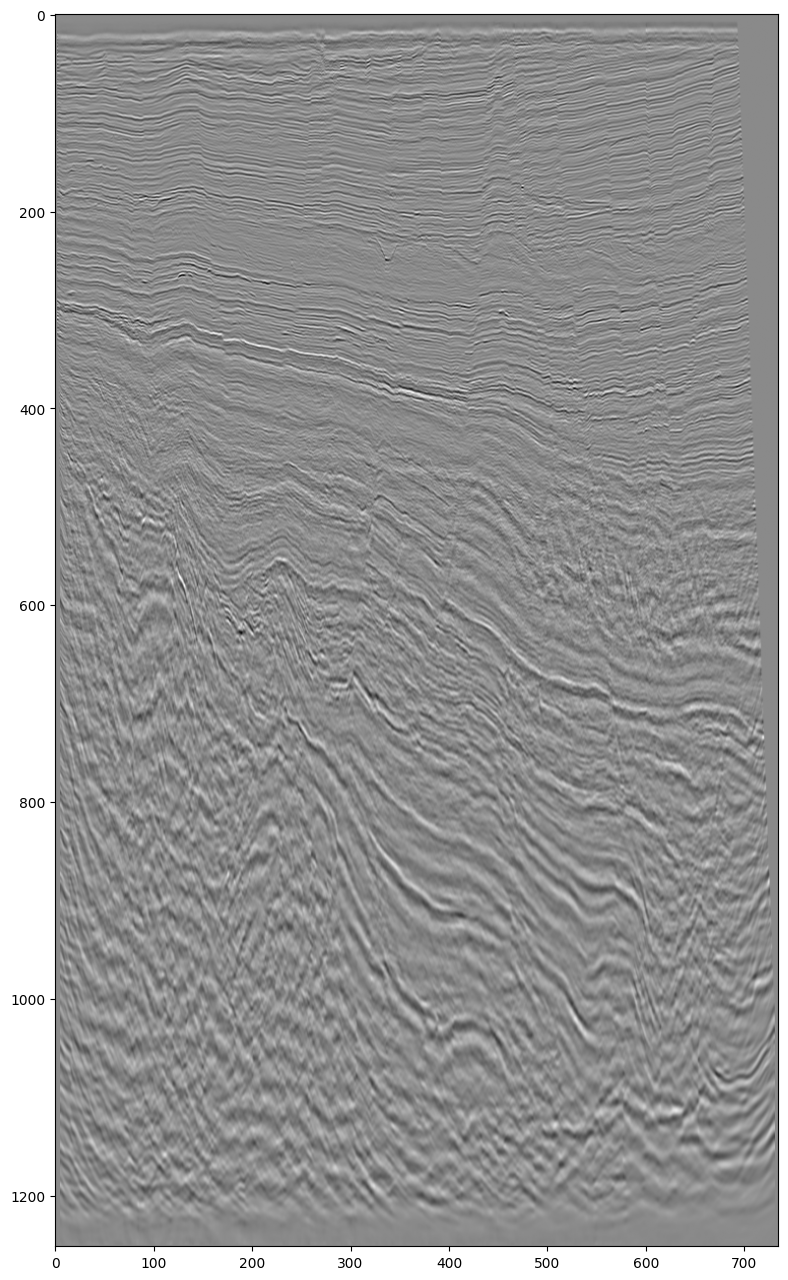

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))
plt.imshow(seis_np[143].transpose(), "gray") # inline 653 plot as: https://wiki.seg.org/wiki/Kerry-3D
plt.show()

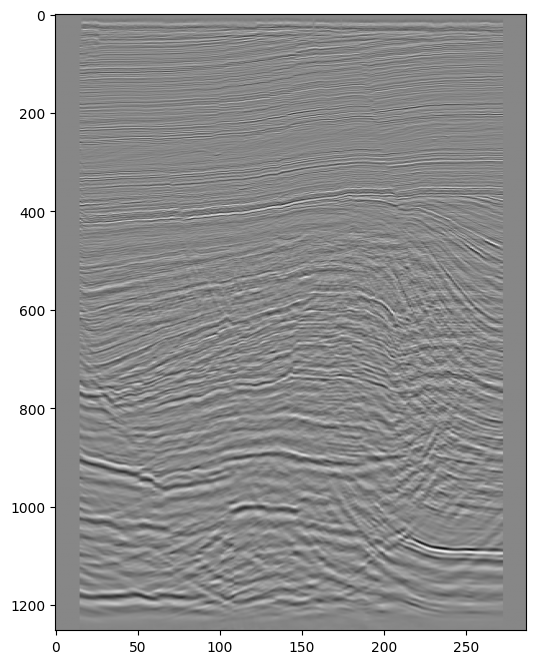

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(seis_np[:,367,:].transpose(), "gray", aspect=0.3)

In [32]:
t0=time.time()
print('sgy save as npz:')
np.savez("/data/anyu/kerry3d",seis_np)
print('--> data save in {:.1f} min'.format((time.time()-t0)/60))

sgy save as npz:
--> data save in 0.1 min
